In [ ]:
data <- read.csv("/content/airline_clnd.csv")

#dataaa <- data[, -which(names(data) == "Type_of_Travel")]
columns_to_delete <- c(1,2,3,4,6,7,10,11,12,14,16,17,18,19,20,21,22,23,24,25)  # Replace with the indices of the columns you want to delete
data <- data[, -columns_to_delete]
head(data)

,Age,Flight_Distance,Inflight_wifi_service,Food_and_drink,Seat_comfort
,<int>,<int>,<int>,<int>,<int>
1,13,460,3,5,5
2,25,235,3,1,1
3,26,1142,2,5,5
4,25,562,2,2,2
5,61,214,3,4,5
6,26,1180,3,1,1


In [ ]:
data <- na.omit(data)
colSums(is.na(data))

apply(data, 2, mean)

apply(data, 2, sd)

Age       Flight_Distance Inflight_wifi_service 
                    0                     0                     0 
       Food_and_drink          Seat_comfort 
                    0                     0

Age       Flight_Distance Inflight_wifi_service 
            39.379706           1189.448375              2.729683 
       Food_and_drink          Seat_comfort 
             3.202129              3.439396

Age       Flight_Distance Inflight_wifi_service 
            15.114964            997.147281              1.327829 
       Food_and_drink          Seat_comfort 
             1.329533              1.319088

In [ ]:
pca <- prcomp(data, center = TRUE, scale = TRUE)
names(pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [ ]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5
Age,0.2150288,0.64342715,0.40760822,-0.59260313,-0.14980386
Flight_Distance,0.2360728,0.61219206,-0.04136124,0.74696367,-0.09912138
Inflight_wifi_service,0.2475767,-0.36911160,0.85311335,0.27300648,0.01128955
Food_and_drink,0.6267085,-0.27199786,-0.26517466,-0.07949719,-0.67573381
Seat_comfort,0.6663141,-0.03156229,-0.18445811,-0.10007226,0.71483573


In [ ]:
pca$sdev

[1] 1.3013246 1.0328611 0.9694287 0.9468661 0.6351416

In [ ]:
# Change the variable name to 'pca_var'
pca_var<-pca$sdev^2
print(pca_var)

[1] 1.6934458 1.0668021 0.9397920 0.8965554 0.4034048


In [ ]:
pca_ve <- pca_var / sum(pca_var)
pca_ve

[1] 0.33868916 0.21336042 0.18795840 0.17931107 0.08068096

In [ ]:
install.packages("ggbiplot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



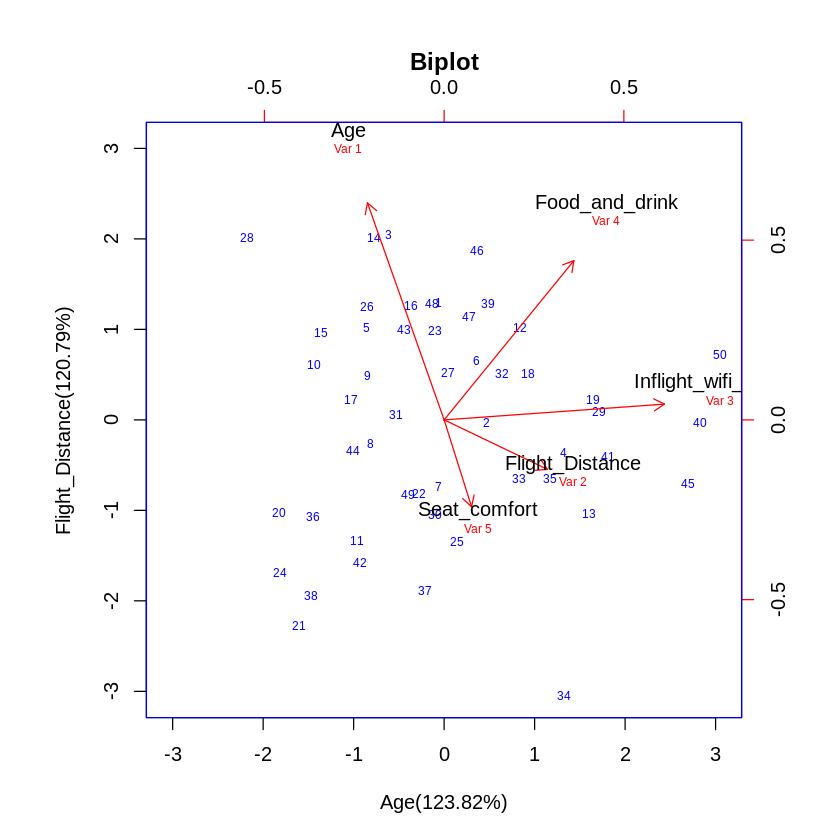

In [ ]:
# تحميل المكتبة المطلوبة
library(ggbiplot)

# إنشاء بيانات عشوائية بـ5 متغيرات و 50 عينة للتوضيح
data <- matrix(rnorm(250), nrow = 50)

# الفئات العشوائية للتوضيح
categories <- sample(c("A", "B", "C", "D", "E"), 50, replace = TRUE)

# حساب PCA
pca <- prcomp(data)

# تخصيص الألوان والأشكال لنقاط البيانات بناءً على الفئات
colors <- c("blue", "red", "green", "orange", "purple")
shapes <- c(16, 8, 9, 13, 15)
category_colors <- colors[as.numeric(factor(categories, levels = unique(categories)))]
category_shapes <- shapes[as.numeric(factor(categories, levels = unique(categories)))]

# أسماء الأعمدة
column_names <- c("Age", "Flight_Distance", "Inflight_wifi_service", "Food_and_drink", "Seat_comfort")

# بدء رسم Biplot مع تعديلات
biplot(pca, scale = 0, cex = 0.6, col = category_colors, pch = category_shapes,
       main = "Biplot",
       xlab = paste(column_names[1], "(", round(pca$sdev[1]*100, 2), "%)", sep = ""),
       ylab = paste(column_names[2], "(", round(pca$sdev[2]*100, 2), "%)", sep = ""))

# إضافة أسماء الأعمدة
text(pca$rotation[, 1:2], labels = column_names, pos = 3, col = "black")

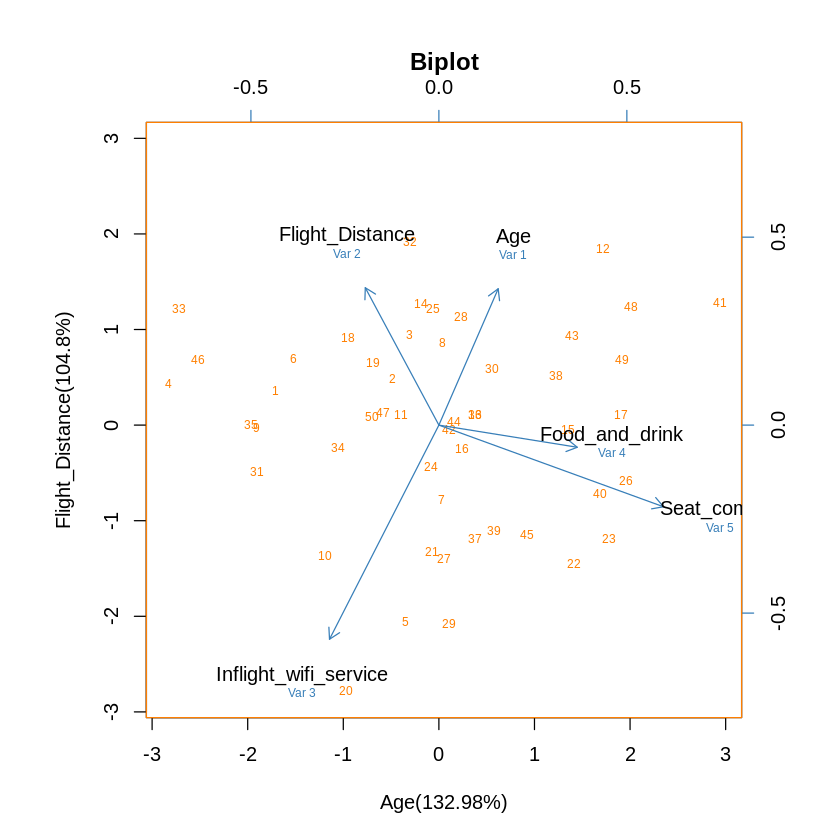

In [ ]:
# تحميل المكتبة المطلوبة
library(ggbiplot)

# إنشاء بيانات عشوائية بـ5 متغيرات و 50 عينة للتوضيح
data <- matrix(rnorm(250), nrow = 50)

# حساب PCA
pca <- prcomp(data)

# تخصيص الألوان والأشكال لنقاط البيانات
colors <- c("#FF7F00", "#377EB8", "#4DAF4A", "orange", "purple")
shapes <- c(16, 8, 9, 13, 15)

# أسماء الأعمدة
column_names <- c("Age", "Flight_Distance", "Inflight_wifi_service", "Food_and_drink", "Seat_comfort")

# بدء رسم Biplot مع تعديلات
biplot(pca, scale = 0, cex = 0.6, col = colors, pch = shapes,
       main = "Biplot",
       xlab = paste(column_names[1], "(", round(pca$sdev[1]*100, 2), "%)", sep = ""),
       ylab = paste(column_names[2], "(", round(pca$sdev[2]*100, 2), "%)", sep = ""))

# إضافة أسماء الأعمدة
text(pca$rotation[, 1:2], labels = column_names, pos = 3, col = "black")

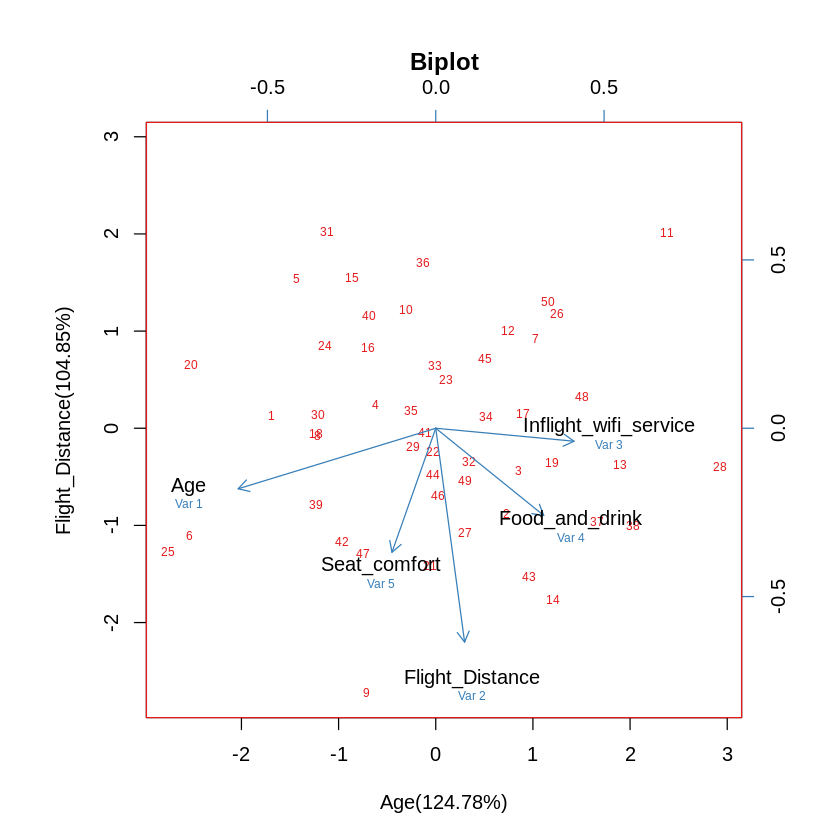

In [ ]:
# تحميل المكتبة المطلوبة
library(ggbiplot)

# إنشاء بيانات عشوائية بـ5 متغيرات و 50 عينة للتوضيح
data <- matrix(rnorm(250), nrow = 50)

# الفئات الفعلية لكل عينة
categories <- c("A", "B", "C", "D", "E")

# حساب PCA
pca <- prcomp(data)

# تخصيص الألوان والأشكال لنقاط البيانات بناءً على الفئات
colors <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00")
shapes <- c(16, 8, 9, 13, 15)
category_colors <- colors[match(categories, unique(categories))]
category_shapes <- shapes[match(categories, unique(categories))]

# أسماء الأعمدة
column_names <- c("Age", "Flight_Distance", "Inflight_wifi_service", "Food_and_drink", "Seat_comfort")

# بدء رسم Biplot مع التعديلات
biplot(pca, scale = 0, cex = 0.6, col = category_colors, pch = category_shapes,
       main = "Biplot",
       xlab = paste(column_names[1], "(", round(pca$sdev[1]*100, 2), "%)", sep = ""),
       ylab = paste(column_names[2], "(", round(pca$sdev[2]*100, 2), "%)", sep = ""))

# إضافة أسماء الأعمدة
text(pca$rotation[, 1:2], labels = column_names, pos = 3, col = "black")